In [1]:
dnn_path_csv = 'C:\\Users\\Rajat\\Desktop\PROJECT_MODE\\Performance_Dataset\\Performance\\data\\dnn_all_csv'
other_models_path_csv =  'C:\\Users\\Rajat\\Desktop\PROJECT_MODE\\Performance_Dataset\\Performance\\data\\other_models_all_csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
ls_dnn_csv = os.listdir(dnn_path_csv)
ls_others_csv = os.listdir(other_models_path_csv)

In [7]:
# For dijkstra mape only from 2nd iterations to last
def plot_boxplot_new_2(df, file, val):
    ls = ['dnn_1', 'dnn_2', 'dnn_3', 'dnn_4']
    new_df = pd.DataFrame(columns = ls) 
    for i in range(len(ls)):
        arr = df['mape'][i][1:-1].split(',') 
        temp = []
        j = 0
        for ele in arr:
            if j%2 == 0:
                temp.append(ele)
            j = j + 1    
        # print(temp)
        arr_new = [float(s[8:-2]) for s in temp]
        # print('For dnn:',ls[i],':',  arr_new)
        new_df[ls[i]] = arr_new
    # print(new_df.head())
    plt.figure()
    boxplot = new_df.boxplot(column = ls)
    plt.title(file)

In [8]:
# For file_not_float
def plot_boxplot_new(df, file, val):
    ls = ['dnn_1', 'dnn_2', 'dnn_3', 'dnn_4']
    new_df = pd.DataFrame(columns = ls) 
    for i in range(len(ls)):
        arr = [float(s[8:-2]) for s in df[val][i][1:-1].split(',')]
        # print('For dnn:',ls[i],':',  arr)
        new_df[ls[i]] = arr
    # print(new_df.head())
    plt.figure()
    boxplot = new_df.boxplot(column = ls)
    plt.title(file)

In [9]:
def plot_boxplot(df, file, val):
    ls = ['dnn_1', 'dnn_2', 'dnn_3', 'dnn_4']
    new_df = pd.DataFrame(columns = ls) 
    for i in range(len(ls)):
        arr = [float(s) for s in df[val][i][1:-1].split(',')]
        new_df[ls[i]] = arr
    # print(new_df.head())
    plt.figure()
    boxplot = new_df.boxplot(column = ls)
    plt.title(file)

# Plotting R2 scores of DNN 

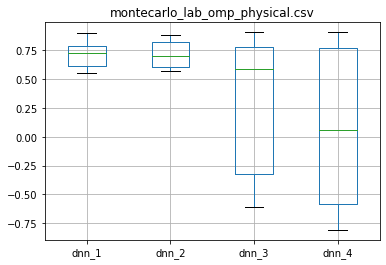

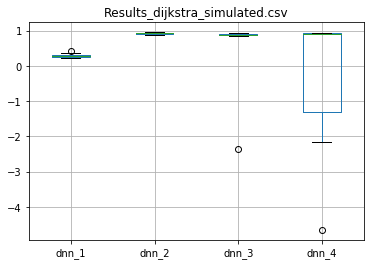

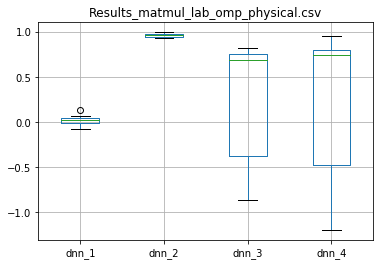

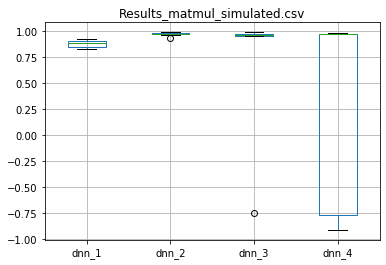

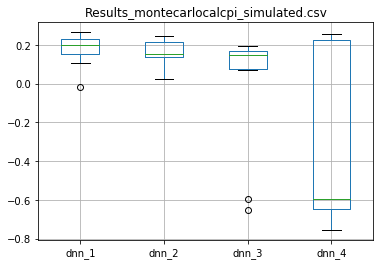

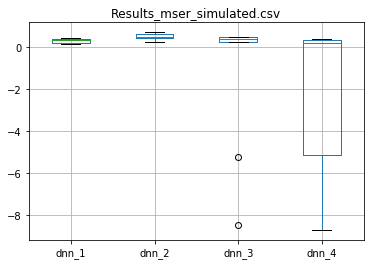

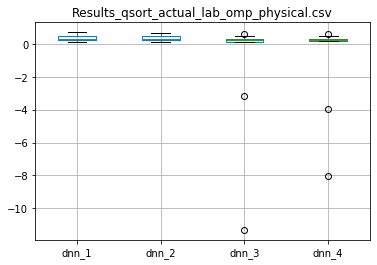

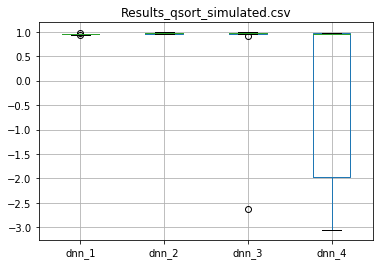

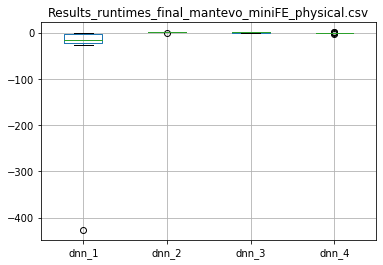

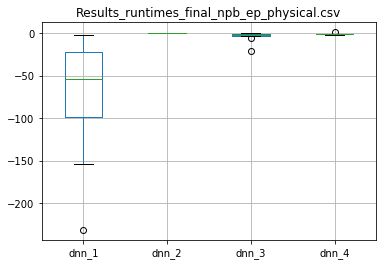

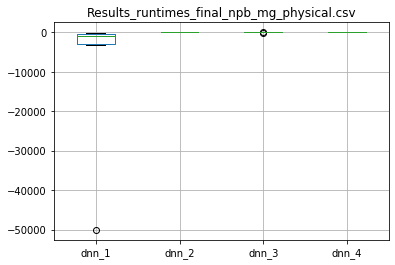

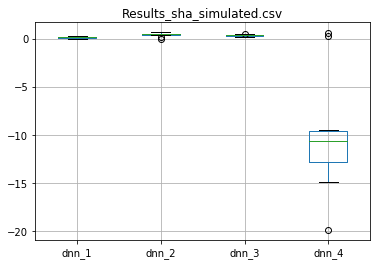

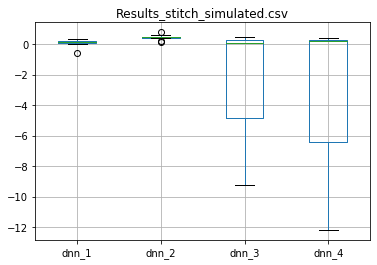

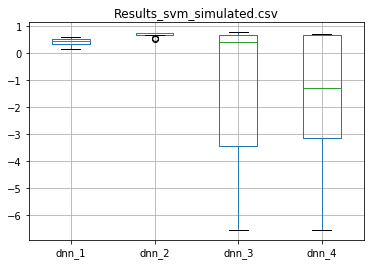

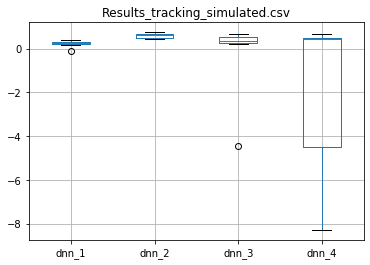

In [10]:
for file in ls_dnn_csv:
    df = pd.read_csv(dnn_path_csv + '/' + file)
    plot_boxplot(df, file,val = 'r2')

# Plotting MSE Scores of DNNs

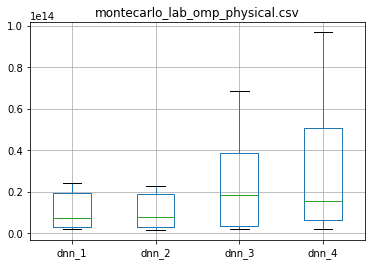

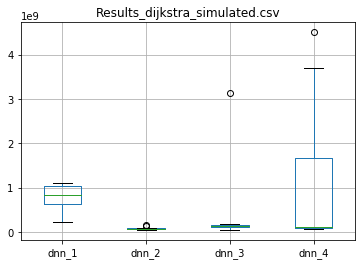

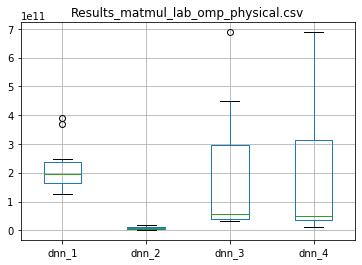

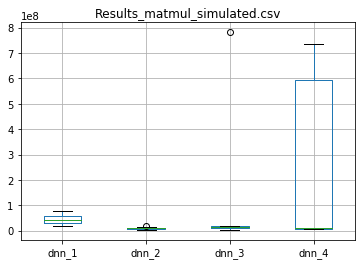

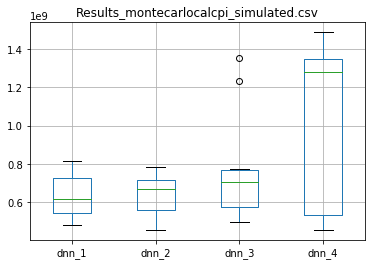

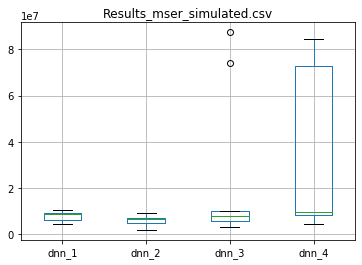

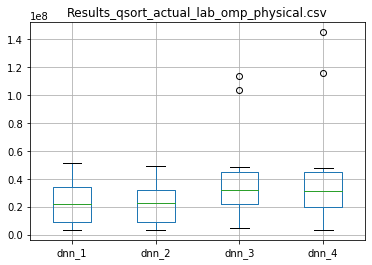

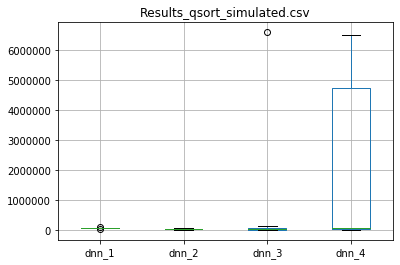

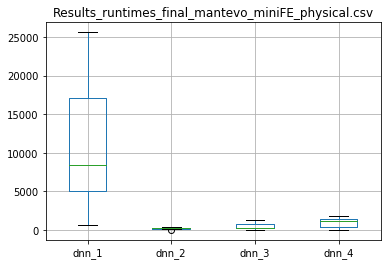

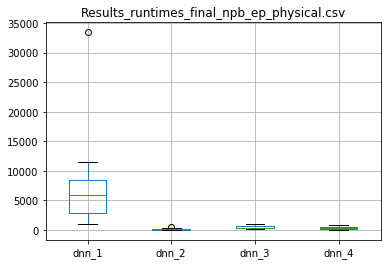

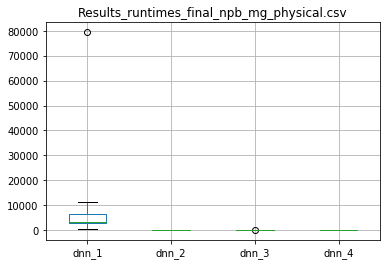

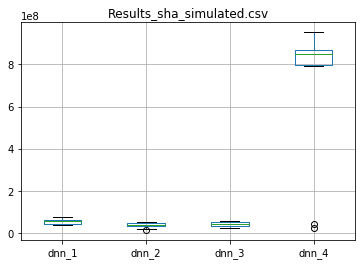

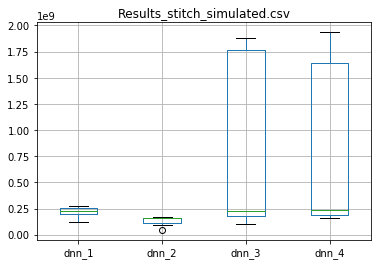

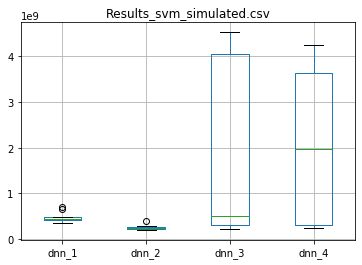

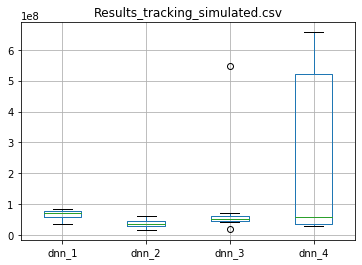

In [11]:
for file in ls_dnn_csv:
    df = pd.read_csv(dnn_path_csv + '/' + file)
    plot_boxplot(df, file,val = 'mse')

# # Plotting MAE Scores of DNNs

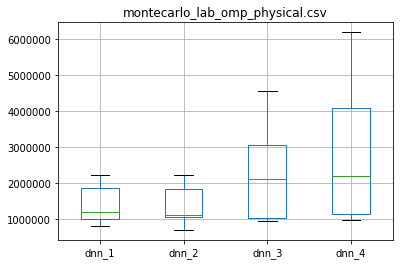

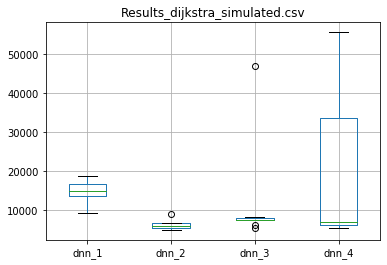

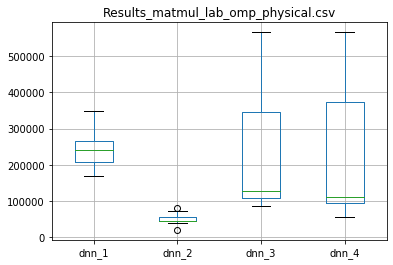

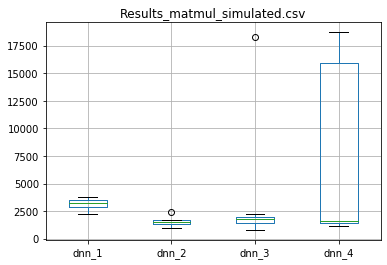

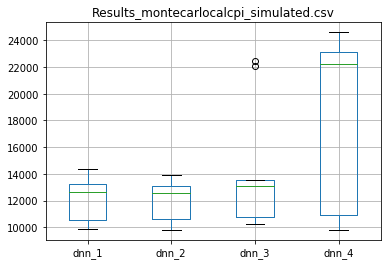

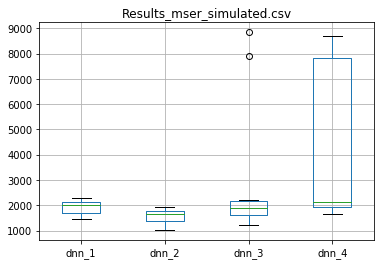

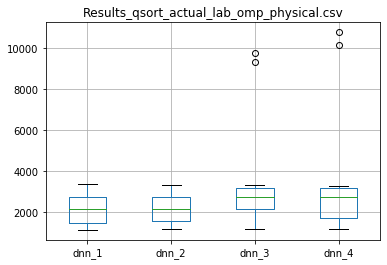

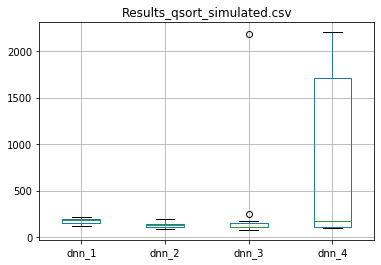

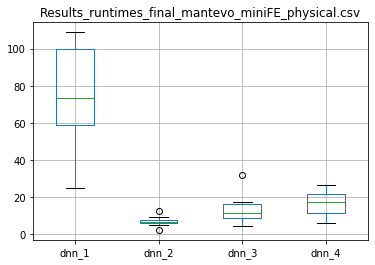

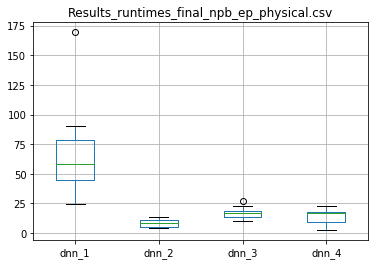

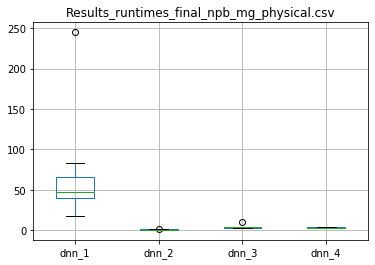

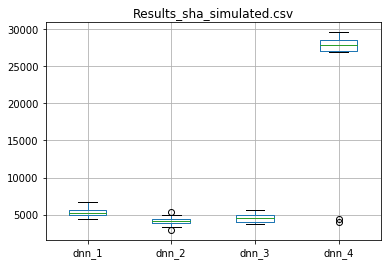

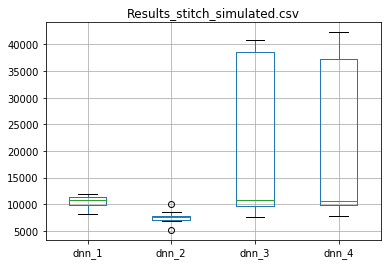

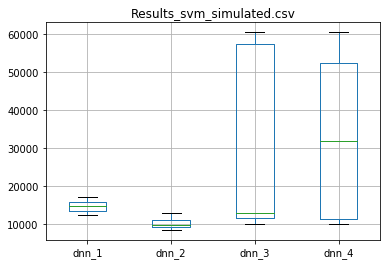

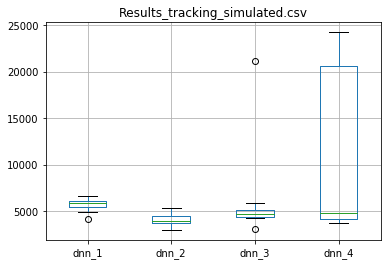

In [12]:
for file in ls_dnn_csv:
    df = pd.read_csv(dnn_path_csv + '/' + file)
    plot_boxplot(df, file,val = 'mae')

# Plotting MAPE Scores of DNNs

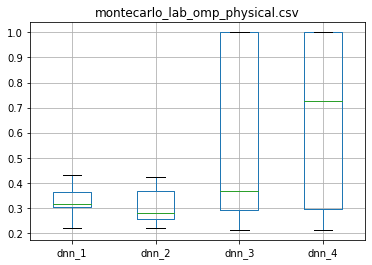

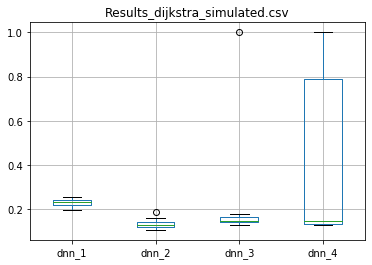

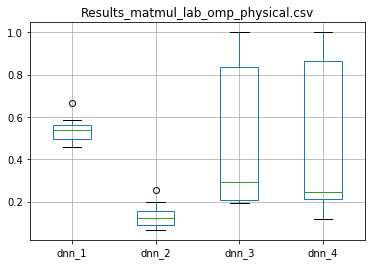

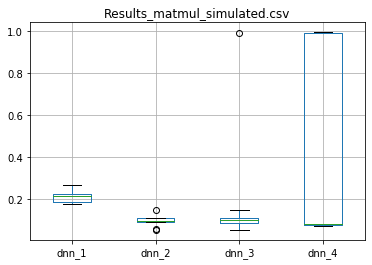

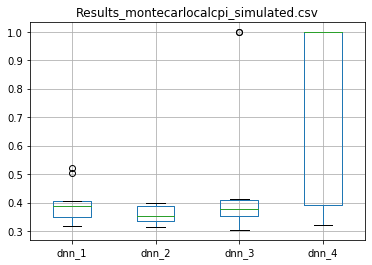

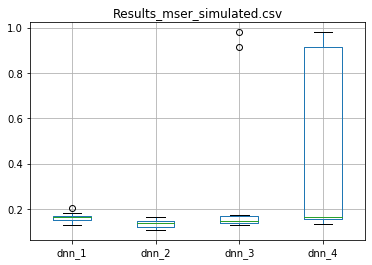

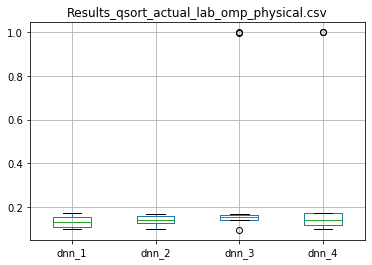

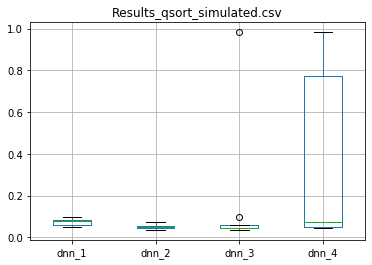

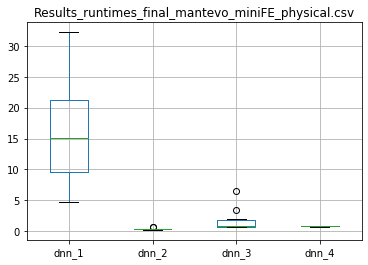

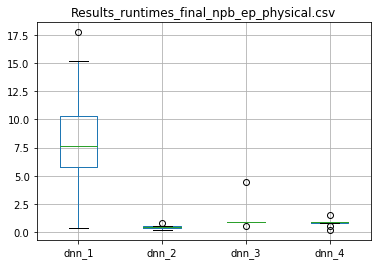

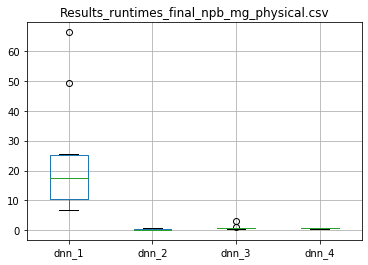

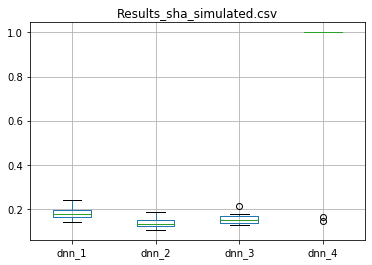

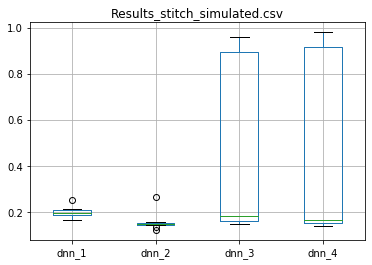

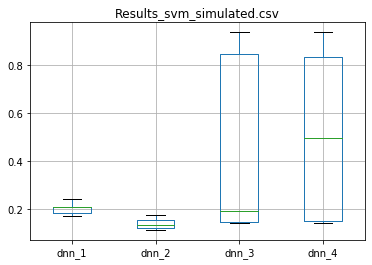

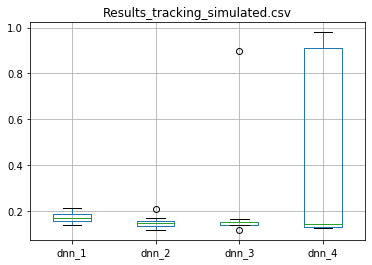

In [13]:
k = 0
file_not_float = ['Results_dijkstra_simulated.csv','Results_matmul_simulated.csv',
                  'Results_montecarlocalcpi_simulated.csv']
                  
for file in ls_dnn_csv:
    # print('Reading File:', file)
    df = pd.read_csv(dnn_path_csv + '/' + file)
    if file in file_not_float:
        plot_boxplot_new(df, file,val = 'mape')
    else: 
        plot_boxplot_new_2(df, file,val = 'mape')